# Problem 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import stan
import arviz as az

import nest_asyncio
nest_asyncio.apply()

## Initial Run

In [24]:
# Generate data from fixed parameters
N = 100
sigma = 1.4
alpha = 3.4
beta = 5.2
x = np.random.normal(size=N)
y = alpha + beta * x + sigma ** 2 * np.random.normal(size=N)

In [25]:
# Build data dictionary
data_dict = {
    'N': N,
    'x': x,
    'y': y
}

# Compile Stan model
program_code = open('regression.stan').read()
model = stan.build(program_code, data_dict)

Building...


Building: found in cache, done.

In [26]:
fit = model.sample(num_chains=4, num_warmup=1000, num_samples=2000)

Sampling:   0%
Sampling:  25% (3000/12000)
Sampling:  50% (6000/12000)
Sampling:  75% (9000/12000)
Sampling: 100% (12000/12000)
Sampling: 100% (12000/12000), done.
Messages received during sampling:
  Gradient evaluation took 7.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.71 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.39 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.38 seconds.
  Adjust your expectations accordingly!


In [27]:
# Posterior summary statistics
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,3.417,0.181,3.073,3.755,0.002,0.001,7844.0,6011.0,1.0
beta,5.360,0.177,5.032,5.696,0.002,0.001,7738.0,6040.0,1.0
sigma2,1.825,0.130,1.576,2.065,0.001,0.001,7684.0,5465.0,1.0
sigma,1.350,0.048,1.255,1.437,0.001,0.000,7684.0,5465.0,1.0


### Analysis
$\alpha = 3.4, \beta = 5.2, \sigma = 1.4$

The program is .017 away from correctly identifying $\alpha$. It has high uncertainty, with an sd of .181 and a 95% CI with a range of .68. Since sd is more than the difference between the real and guessed value, the program is on track.

The program is .16 away from correctly identifying $\beta$. It has high uncertainty, with an sd of .177 and a 95% CI with a range of .66. Since sd is more than the difference between the real and guessed value, the program is on track.

The program is .05 away from correctly identifying $\sigma$. It has the lowest uncertainty, with an sd of .048 and a 95% CI with a range of .18. Since sd is less than the difference between the real and guessed value, the program is off track.

/home/carror/miniconda3/envs/cognitive/lib/python3.12/site-packages/arviz/plots/backends/matplotlib/traceplot.py:433: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for chain_id in range(data.dims["chain"])


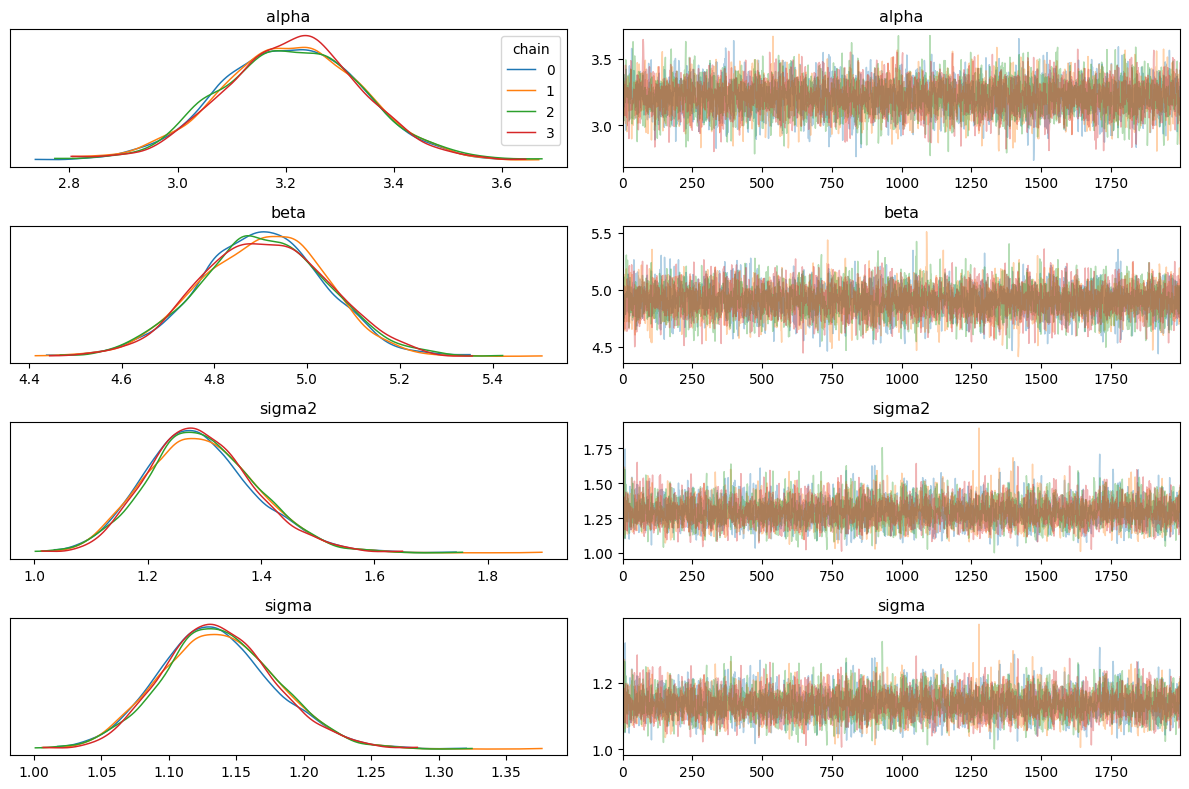

In [22]:
# Traceplots 
f = az.plot_trace(fit, compact=False, legend=True)
plt.tight_layout()

### Adjusting N

In [31]:
# Generate data from fixed parameters and new N
N = 1000
x = np.random.normal(size=N)
y = alpha + beta * x + sigma ** 2 * np.random.normal(size=N)

In [32]:
# Build data dictionary
data_dict = {
    'N': N,
    'x': x,
    'y': y
}

# Compile Stan model
program_code = open('regression.stan').read()
model = stan.build(program_code, data_dict)

Building...



Building: found in cache, done.

In [33]:
fit = model.sample(num_chains=4, num_warmup=1000, num_samples=2000)

Sampling:   0%
Sampling:   2% (200/12000)
Sampling:   4% (500/12000)
Sampling:   7% (800/12000)
Sampling:  10% (1200/12000)
Sampling:  33% (4000/12000)
Sampling:  56% (6700/12000)
Sampling:  78% (9400/12000)
Sampling: 100% (12000/12000)
Sampling: 100% (12000/12000), done.
Messages received during sampling:
  Gradient evaluation took 0.000217 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.17 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000254 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.54 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.00025 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.5 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.000217 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.17 seconds.
  Adjust your expectations accordingly!


In [34]:
# Posterior summary statistics
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,3.475,0.066,3.353,3.598,0.001,0.0,8819.0,6160.0,1.0
beta,5.346,0.065,5.224,5.466,0.001,0.0,9444.0,6095.0,1.0
sigma2,2.070,0.045,1.987,2.157,0.001,0.0,7988.0,6048.0,1.0
sigma,1.439,0.016,1.410,1.469,0.000,0.0,7988.0,6048.0,1.0


### Analysis
$\alpha = 3.4, \beta = 5.2, \sigma = 1.4$

The program is .075 away from correctly identifying $\alpha$. It has low uncertainty, with an sd of .066 and a 95% CI with a range of .24. Since sd is less than the difference between the real and guessed value, the program is off track. The real value is in the 95% CI. The program is more confident, but less accurate.

The program is .15 away from correctly identifying $\beta$. It has low uncertainty, with an sd of .065 and a 95% CI with a range of .24. Since sd is less than the difference between the real and guessed value, the program is off track. The real value is not in the 95% CI. The program is more confident, but less accurate.

The program is .039 away from correctly identifying $\sigma$. It has the lowest uncertainty, with an sd of .016 and a 95% CI with a range of .06. Since sd is less than the difference between the real and guessed value, the program is off track. The real value is not in the 95% CI. The program is more confident, but less accurate.

/home/carror/miniconda3/envs/cognitive/lib/python3.12/site-packages/arviz/plots/backends/matplotlib/traceplot.py:433: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for chain_id in range(data.dims["chain"])


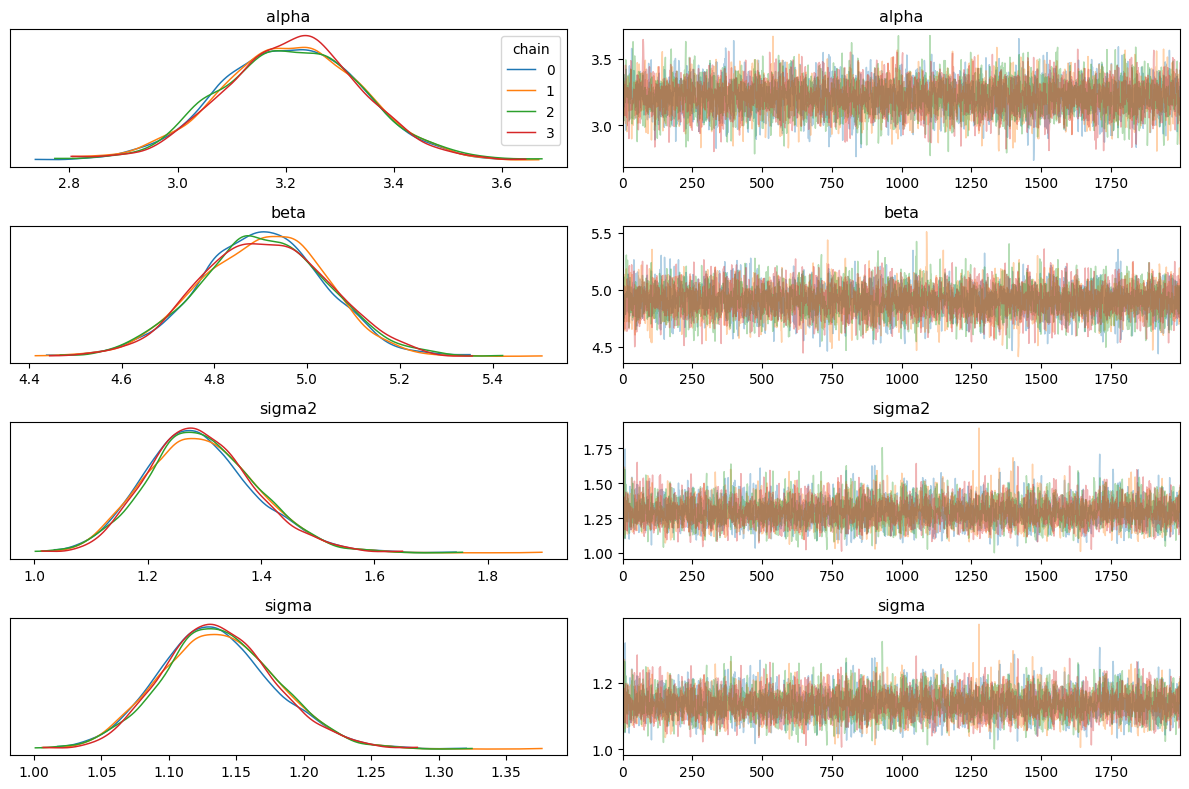

In [ ]:
# Traceplots 
f = az.plot_trace(fit, compact=False, legend=True)
plt.tight_layout()